In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from  matplotlib.colors import LogNorm
from math import *
from scipy.interpolate import interp1d

In [12]:
beamwt = np.genfromtxt("cwt-beam-1_2-3.csv", delimiter=",", dtype=float)

In [13]:
fresp = np.genfromtxt("freq-beam-1_2-3.csv", delimiter=",", dtype=float)

In [18]:
f0 = 3.5491552309492658 # initial frequency (Hz)
fend = 19.4646495401388 # final frequency (Hz)
fs = 2*494.71999999999997 # sampling frequency
Npoint=len(beamwt[0])
t=1/fs
Tsimul=(Npoint-1)*t
t=1/fs
exc_finst = np.linspace(f0, fend, Npoint) # instantaneous excitation frequency
T=np.linspace(0,Tsimul,Npoint)

In [19]:
Tsimul

36.83396668822768

TypeError: Colorbar.__init__() got an unexpected keyword argument 'vmin'

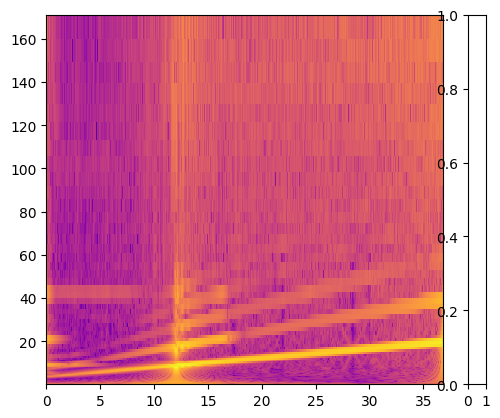

In [20]:
plt.pcolormesh(T,fresp,beamwt,cmap="plasma",norm=LogNorm(vmin=beamwt.min(), vmax=beamwt.max()))
plt.colorbar(vmin=beamwt)


In [21]:
fnorm = np.linspace(0, 10, 200) # Vector of frequency ratios
wt_amp_scaled = np.zeros((len(fnorm),Npoint))
for i in range(Npoint):
  fscaled = (fresp/exc_finst[i]).reshape(len(beamwt))
  scaling = interp1d(fscaled, beamwt[:,i], kind='linear', bounds_error=False, fill_value=np.percentile(beamwt[:,i], 25))
  wt_amp_scaled[:,i]=scaling(fnorm)

In [22]:
#plt.pcolormesh(T,fnorm,wt_amp_scaled, norm=LogNorm(vmin=wt_amp_scaled.min(), vmax=wt_amp_scaled.max()))
#plt.colorbar()

In [23]:
'''Norm n
n = 2
wt_amp_scaled2 = np.zeros(np.shape(wt_amp_scaled))
for i in range(Npoint):
  normn=np.sum(wt_amp_scaled[:,i]**n)**(1/n)
  wt_amp_scaled2[:,i] = wt_amp_scaled[:,i] / normn
'''

'Norm n\nn = 2\nwt_amp_scaled2 = np.zeros(np.shape(wt_amp_scaled))\nfor i in range(Npoint):\n  normn=np.sum(wt_amp_scaled[:,i]**n)**(1/n)\n  wt_amp_scaled2[:,i] = wt_amp_scaled[:,i] / normn\n'

In [24]:
#plt.pcolormesh(T,fnorm,wt_amp_scaled2, norm=LogNorm(vmin=wt_amp_scaled3.min(), vmax=6))
#plt.pcolormesh(T,fnorm,wt_amp_scaled2,norm=LogNorm(vmin=wt_amp_scaled2.min(), vmax=wt_amp_scaled2.max()))
#plt.colorbar()

In [25]:
'''Norm around 1'''
wt_amp_scaled3 = np.zeros(np.shape(wt_amp_scaled))
for i in range(Npoint):
  norm=np.sum(wt_amp_scaled[17:28,i])/5
  wt_amp_scaled3[:,i] = wt_amp_scaled[:,i] / norm

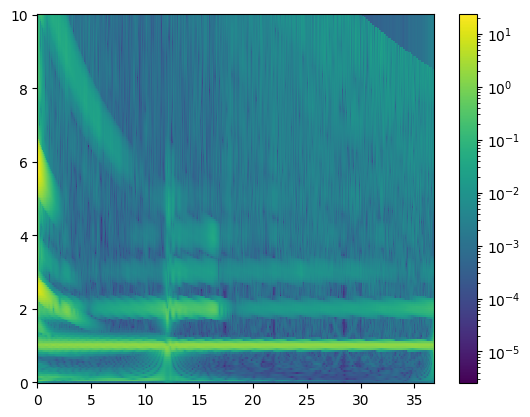

In [26]:
#plt.pcolormesh(T,fnorm,wt_amp_scaled3, norm=LogNorm(vmin=wt_amp_scaled3.min(), vmax=6))
#plt.pcolormesh(T,fnorm,wt_amp_scaled3)
plt.pcolormesh(T,fnorm,wt_amp_scaled3, norm=LogNorm(vmin=wt_amp_scaled3.min(), vmax=wt_amp_scaled3.max()))
plt.colorbar()

In [27]:
#wt_amp_scaled3.tofile('scaled-1_3-.csv',sep=',')

In [28]:
np.shape(wt_amp_scaled3)

(200, 36446)

In [29]:
l=[]
l2=[]
for i in range(Npoint):
  norm1=np.sum(wt_amp_scaled3[15:26,i])
  norm2=np.sum(wt_amp_scaled3[35:46,i])
  l2.append(norm2/norm1)
  if norm1<norm2:
    l.append(2)
  else:
    l.append(1)
l=np.array(l)
l2=np.array(l2)

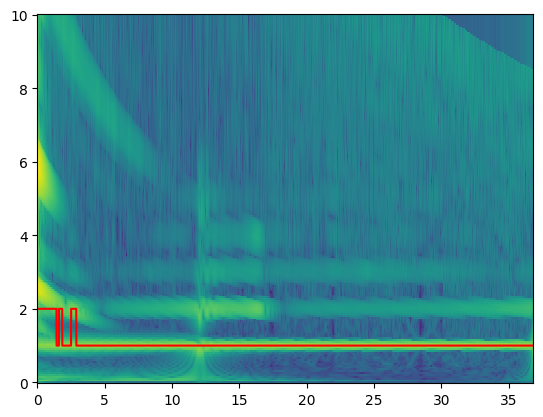

In [30]:
plt.plot(T,l, color='red')
plt.pcolormesh(T,fnorm,wt_amp_scaled3, norm=LogNorm(vmin=wt_amp_scaled3.min(), vmax=wt_amp_scaled3.max()))

Text(0.5, 1.0, 'N2/N1')

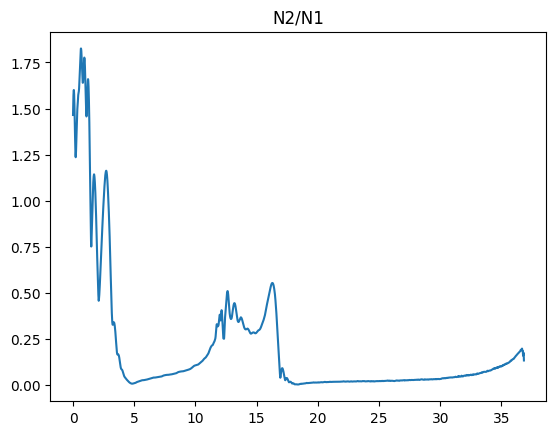

In [31]:
plt.plot(T,l2)
plt.title('N2/N1')